In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [56]:
# A0:85:E3:E8:00:EC master
# B4:3A:45:A3:54:04 left mid
# FC:01:2C:C5:4A:48 right mid
# 94:A9:90:2E:92:08 right bottom
# F0:9E:9E:1E:4A:E4 left bottom
# F0:9E:9E:1E:4A:84 left top
# F0:9E:9E:21:E2:70 right top

mac1 = [["F0:9E:9E:1E:4A:84", "F0:9E:9E:21:E2:70"],  # left top, right top
        ["B4:3A:45:A3:54:04","FC:01:2C:C5:4A:48"],    # left mid, right mid
        ["F0:9E:9E:1E:4A:E4", "94:A9:90:2E:92:08"]]   # left bottom, right bottom

macs = [
        "F0:9E:9E:1E:4A:84", "B4:3A:45:A3:54:04","F0:9E:9E:1E:4A:E4",   # left side
        "F0:9E:9E:21:E2:70", "FC:01:2C:C5:4A:48", "94:A9:90:2E:92:08",  # right side
]



In [52]:
x = np.linspace(-1, 1, 6)
y = np.linspace(-1, 1, 6)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)

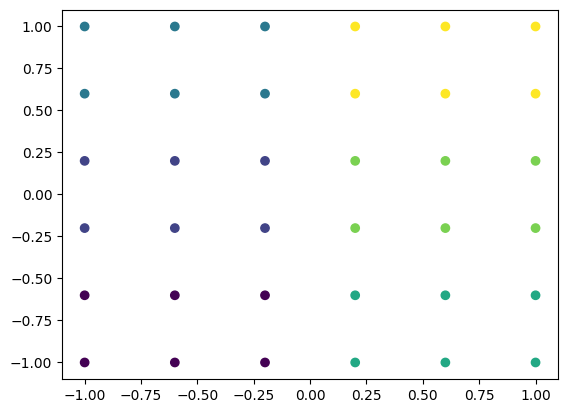

array([[0, 0, 0, 3, 3, 3],
       [0, 0, 0, 3, 3, 3],
       [1, 1, 1, 4, 4, 4],
       [1, 1, 1, 4, 4, 4],
       [2, 2, 2, 5, 5, 5],
       [2, 2, 2, 5, 5, 5]])

In [ ]:
mac_labels = np.empty([6,6], dtype=int)

for i in range(len(x)):
    for j in range(len(y)):
        if xx[i][j] < 0:
            if yy[i][j] <= -.6:
                mac_labels[i][j] = 0
            elif yy[i][j] >= -.2 and yy[i][j] <= .6:
                mac_labels[i][j] = 1
            elif yy[i][j] > .6:
                mac_labels[i][j] = 2
        elif xx[i][j] > 0:
            if yy[i][j] <= -.6:
                mac_labels[i][j] = 3
            elif yy[i][j] >= -.2 and yy[i][j] <= .6:
                mac_labels[i][j] = 4
            elif yy[i][j] > .6:
                mac_labels[i][j] = 5
        else:
            mac_labels[i][j] = 10

plt.scatter(xx,yy, marker="o", c=mac_labels)      
plt.show() 

mac_labels

In [103]:
mac_config = {i : macs[i] for i in range(len(macs))}

mac_config.keys()

dict_keys([0, 1, 2, 3, 4, 5])

[[1.41421356 1.16619038 1.0198039  1.0198039  1.16619038 1.41421356]
 [1.16619038 0.84852814 0.63245553 0.63245553 0.84852814 1.16619038]
 [1.0198039  0.63245553 0.28284271 0.28284271 0.63245553 1.0198039 ]
 [1.0198039  0.63245553 0.28284271 0.28284271 0.63245553 1.0198039 ]
 [1.16619038 0.84852814 0.63245553 0.63245553 0.84852814 1.16619038]
 [1.41421356 1.16619038 1.0198039  1.0198039  1.16619038 1.41421356]]


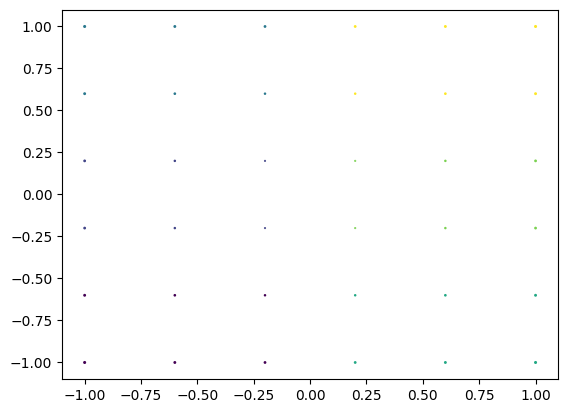

In [ ]:
z = np.sqrt(xx**2 + yy**2)
print(z)
plt.scatter(xx,yy,z, marker="o", c=mac_labels)      
plt.show()

[[1433. 1383. 1354. 1354. 1383. 1433.]
 [1383. 1320. 1276. 1276. 1320. 1383.]
 [1354. 1276. 1207. 1207. 1276. 1354.]
 [1354. 1276. 1207. 1207. 1276. 1354.]
 [1383. 1320. 1276. 1276. 1320. 1383.]
 [1433. 1383. 1354. 1354. 1383. 1433.]]


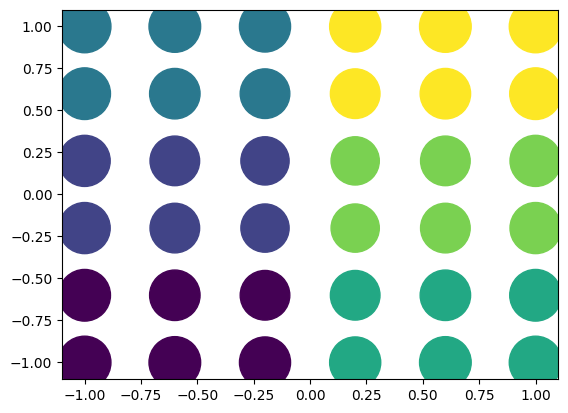

motor 1433 1383 1354 1383 1320 1276 10000 F0:9E:9E:1E:4A:84
motor 1354 1276 1207 1354 1276 1207 10000 B4:3A:45:A3:54:04
motor 1383 1320 1276 1433 1383 1354 10000 F0:9E:9E:1E:4A:E4
motor 1354 1383 1433 1276 1320 1383 10000 F0:9E:9E:21:E2:70
motor 1207 1276 1354 1207 1276 1354 10000 FC:01:2C:C5:4A:48
motor 1276 1320 1383 1354 1383 1433 10000 94:A9:90:2E:92:08
hold 10100


In [176]:
interval_min = 1200
interval_max = 1400

scaled_z = (z - np.min(z) / (np.max(z) - np.min(z))) * (interval_max - interval_min) + interval_min
print (scaled_z.round(0))
plt.scatter(xx,yy,scaled_z, marker="o",  c=mac_labels)      
plt.show()

time_interval = 10000   #in ms

for i in mac_config.keys():
    temp = []
    a,b = np.where(mac_labels == i)
    for j in range(6):
        temp.append(str(int(scaled_z[a[j]][b[j]].round(0))))
    print("motor", ' '.join(temp), time_interval, mac_config[i])

print(f"hold {int(time_interval*1.01)}")